In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# data loading and initial assessment

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.shape

(20640, 10)

In [6]:
df.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [7]:
df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)

# data cleaning

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.duplicated().sum() # if exists use drop_duplicates()

0

In [12]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [13]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,NaN


# Exploratory Data Analysis
1. linear regression assumes data is numeric with meaningfull variations
   so we need to check for skewed distribution and abnornal ranges and suspicious values

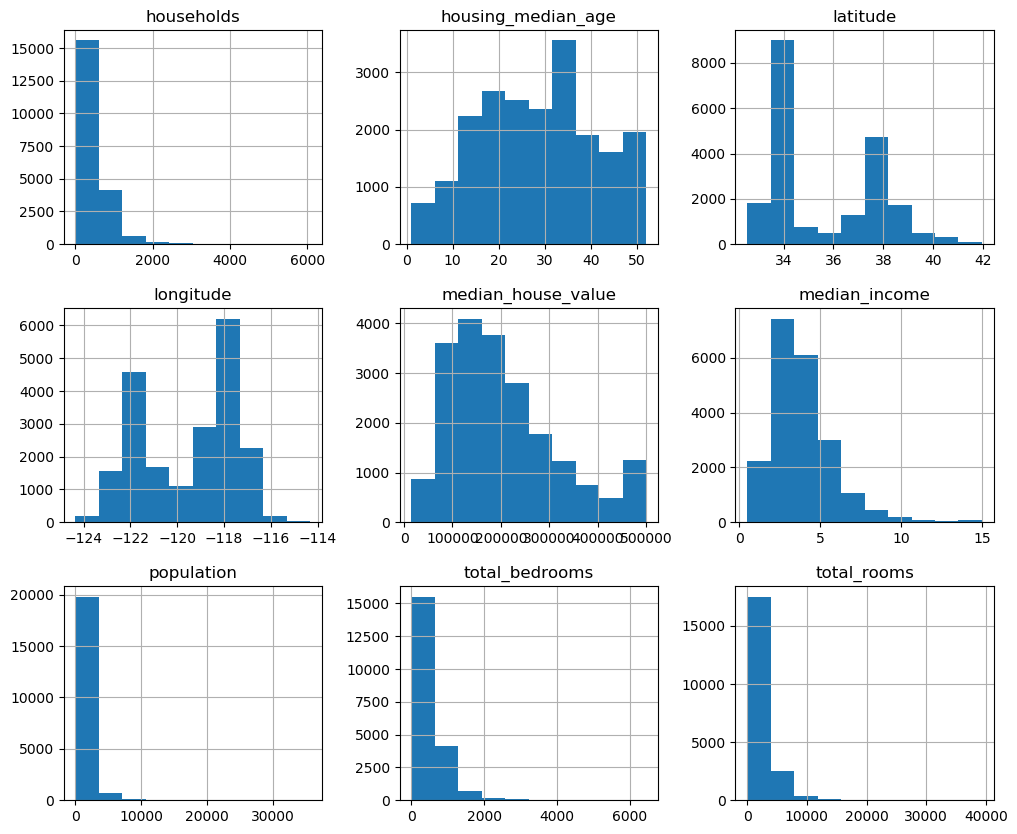

In [14]:
df.hist(figsize = (12,10))
plt.show()

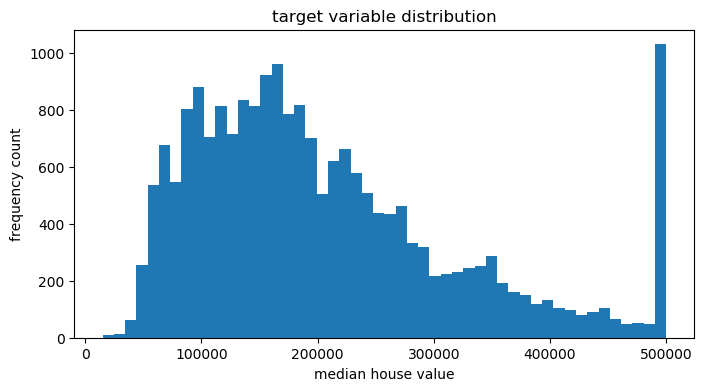

In [15]:
plt.figure(figsize=(8,4))
plt.hist(df['median_house_value'],bins=50)
plt.xlabel("median house value")
plt.ylabel("frequency count")
plt.title("target variable distribution")
plt.show()


above distribution the spike at the end is expected due to know data collection limitations
and thats called artificial constraints

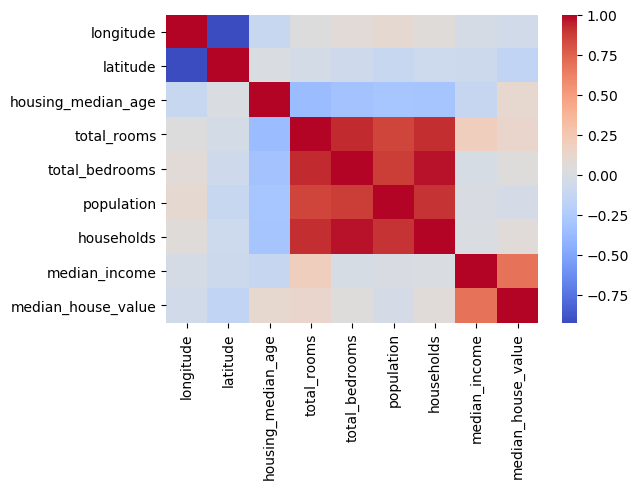

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(df._get_numeric_data().corr(),cmap='coolwarm')
plt.show()

we can see in above graph which shows relation ship with target variable

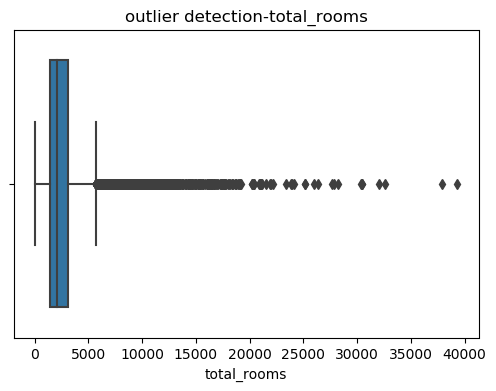

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_rooms'])
plt.title('outlier detection-total_rooms')
plt.show()

the above graph is boxplot which is nothing but iqr concept the box represents middle 50% 
of the data and diamond represents outliers till 15k to 18k acceptable rest are outliers

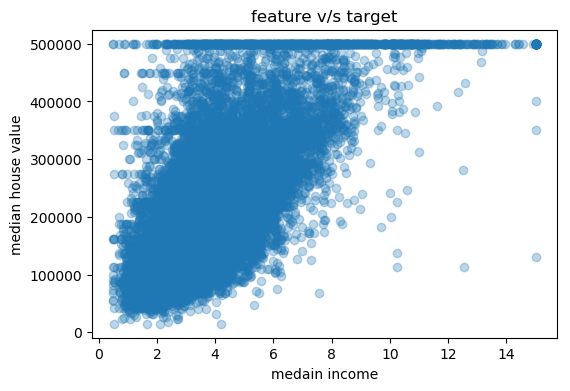

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(df['median_income'],df['median_house_value'],alpha=0.3)
plt.xlabel("medain income")
plt.ylabel("median house value")
plt.title("feature v/s target")
plt.show()

# feature engineering

In [19]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [20]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [21]:
df = pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True) # we use drop_first = true
# because to avoid multicollinearity whereeach variable depends on each other

# we use feature creation later once base model is done later we improve the features

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [23]:
df.nunique()

longitude                       844
latitude                        862
housing_median_age               52
total_rooms                    5926
total_bedrooms                 1923
population                     3888
households                     1815
median_income                 12928
median_house_value             3842
ocean_proximity_INLAND            2
ocean_proximity_ISLAND            2
ocean_proximity_NEAR BAY          2
ocean_proximity_NEAR OCEAN        2
dtype: int64

In [24]:
x = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [25]:
print(x.shape)
print(y.shape)
print(df.isna().sum())

(20640, 12)
(20640,)
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [26]:
df.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object

whenever we see total values we have to ask per what value thats how we create new features
1. most common one we use is 
   - per unit features
   - ratio features
   - density features
   - interaction features 

# preprocessing

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print("train x:",x_train.shape)
print("test x:",x_test.shape)

train x: (16512, 12)
test x: (4128, 12)


In [28]:
scaler = StandardScaler()
x_tra_scaled = scaler.fit_transform(x_train)
x_tes_scaled = scaler.transform(x_test)

# fit only on training data and use only for features not the target
# fit means uses data parameters and gives while tranform gives scaled data which uses parameters found 
# on the fit while when we use transform in the test data it only learns from the parameters of the train data

print(x_tra_scaled.mean())
print(x_tra_scaled.std())

1.3558634548151541e-16
1.0


In [29]:
print(np.mean(x_tra_scaled,axis=1))
print(np.std(x_tra_scaled,axis=0))

[ 0.25208507  0.37493552 -0.23799068 ... -0.10943818 -0.06613208
  0.67207616]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# model training

In [30]:
model = LinearRegression()
model.fit(x_tra_scaled,y_train)

LinearRegression()

In [50]:
y_pred = model.predict(x_tes_scaled)
y_pred_t = model.predict(x_tra_scaled)

In [32]:
comparison = pd.DataFrame({
    "actual":y_test.values,
    "predicted":y_pred
})
print(comparison.head(10))

     actual      predicted
0   47700.0   54055.448899
1   45800.0  124225.338937
2  500001.0  255489.379492
3  218600.0  268002.431569
4  278000.0  262769.434816
5  158700.0  139606.303956
6  198200.0  290665.423914
7  157500.0  228264.876375
8  340000.0  256506.785610
9  446600.0  407923.858435


In [33]:
print("slope:",model.coef_)
print("intercept:",model.intercept_)

slope: [-53826.64801649 -54415.6961445   13889.86618856 -13094.25116219
  43068.18184187 -43403.43242732  18382.19632373  75167.77476625
 -18506.09522509   2118.43757154  -1621.70501786   1139.90559187]
intercept: 207194.69373788772


# model evaluation before improvement

In [51]:
train_r2 = r2_score(y_train,y_pred_t) 

In [52]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print("mse:",mse)
print("rmse:",rmse)
print("r2 score on test:",r2)
print("r2 score on train:",train_r2)

mse: 4908476721.156615
rmse: 70060.52184473518
r2 score on test: 0.6254240620553606
r2 score on train: 0.6496648627123223


# model improvement

In [35]:
df2 = pd.read_csv("housing.csv")

In [36]:
df2.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [37]:
df2.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [38]:
df2['total_bedrooms'] = df2['total_bedrooms'].fillna(df2['total_bedrooms'].median())

In [39]:
df2.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [40]:
df2 = pd.get_dummies(df2,columns=['ocean_proximity'],drop_first=True)

In [41]:
df2['rooms_per_household'] = df2['total_rooms']/df2['households']
df2['bedrooms_per_room'] = df2['total_bedrooms']/df2['total_rooms']
df2['population_per_household'] = df2['population']/df2['households']

In [42]:
x2 = df2.drop('median_house_value',axis=1)
y2 = df2['median_house_value']

In [43]:
x_tr,x_ts,y_tr,y_ts = train_test_split(x2,y2,test_size=0.2,random_state = 46)

In [44]:
sc = StandardScaler()
ttrx = sc.fit_transform(x_tr)
tttx = sc.transform(x_ts)

In [45]:
print(ttrx.shape)
print(tttx.shape)

(16512, 15)
(4128, 15)


In [46]:
print(y_tr.shape)
print(y_ts.shape)

(16512,)
(4128,)


In [53]:
model2 = LinearRegression()
model2.fit(ttrx,y_tr)
p = model2.predict(tttx)
pt = model2.predict(ttrx)

In [54]:
mse2 = mean_squared_error(y_ts,p)
rmse2 = np.sqrt(mse2)
r22=r2_score(y_ts,p)
r2t=r2_score(y_tr,pt) 
print("mse:",mse2)
print("rmse:",rmse2)
print("r2 score on test:",r22)
print("r2 score on train:",r2t)

mse: 4661212959.747986
rmse: 68273.07638995028
r2 score on test: 0.6536860002293172
r2 score on train: 0.6485460982341331


# conclusion
we done linear regression
1. done eda and feature engeneeing and found relationships
2. created new features like population per families total bedrooms per family etc
3. we done scaling so regression behaves normally and its essential for regression problems 
   which converst values into range of mean and std
4. we trained the model on scaled data only for training for testing we used scaled test data from trained parameters 
5. got r2 0.65 which acceptable model 
6. we check overfitting and underfitting in model evaluation and model improvement stage

# underfitting overfitting
if train is high and test is low then its overfitting 
if both low then its underfitting 
both high good fit